In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df['reviews per month'].fillna(0, inplace=True)
df['review rate number'].fillna(0, inplace=True)

C:\Users\Abdellatif\AppData\Local\Temp\ipykernel_19152\4185038556.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews per month'].fillna(0, inplace=True)
C:\Users\Abdellatif\AppData\Local\Temp\ipykernel_19152\4185038556.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Abdellatif\AppData\Local\Temp\ipykernel_19152\3686992652.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\Abdellatif\AppData\Local\Temp\ipykernel_19152\3686992652.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['service fee'] = df['service fee'].replace('[\$,]', '', regex=True).astype(float)


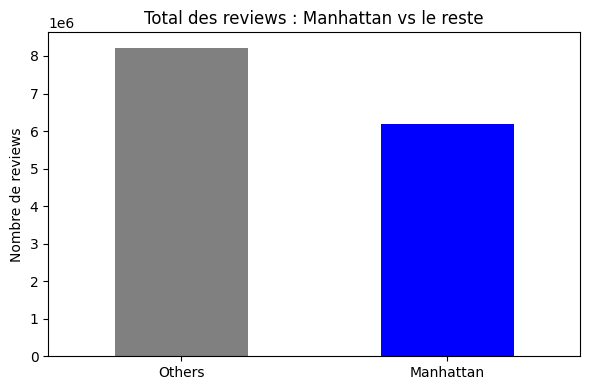

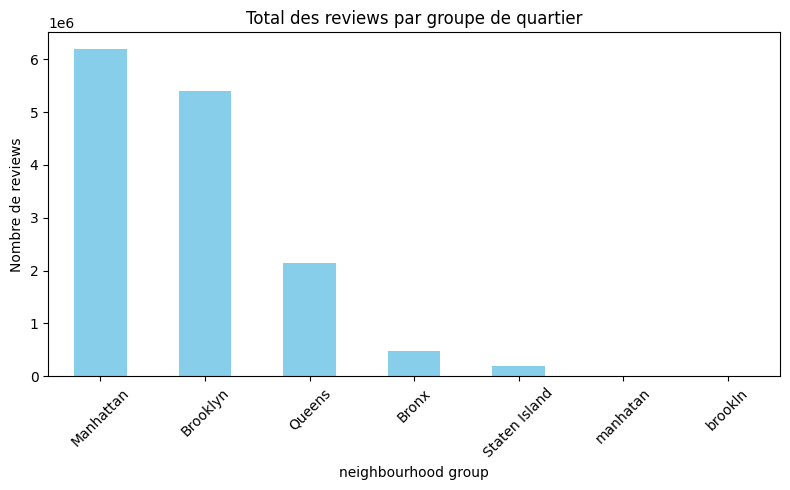

In [29]:
# Nettoyage des colonnes numériques
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].replace('[\$,]', '', regex=True).astype(float)
df['number of reviews'] = pd.to_numeric(df['number of reviews'], errors='coerce').fillna(0)

# Créer une colonne binaire : est-ce à Manhattan ?
df['is_manhattan'] = df['neighbourhood group'] == 'Manhattan'

# Agrégation : Manhattan vs autres
agg_manhattan_vs_others = df.groupby('is_manhattan')['number of reviews'].sum()
agg_manhattan_vs_others.index = ['Others', 'Manhattan']  # False -> Others, True -> Manhattan

# Graph 1 : Manhattan vs Others
plt.figure(figsize=(6,4))
agg_manhattan_vs_others.plot(kind='bar', color=['gray', 'blue'])
plt.title("Total des reviews : Manhattan vs le reste")
plt.ylabel("Nombre de reviews")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Graph 2 : Tous les groupes de quartiers
agg_all_neigh = df.groupby('neighbourhood group')['number of reviews'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
agg_all_neigh.plot(kind='bar', color='skyblue')
plt.title("Total des reviews par groupe de quartier")
plt.ylabel("Nombre de reviews")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

cancellation_policy
strict      141.090453
flexible    140.469772
moderate    139.924118
Name: number of reviews, dtype: float64


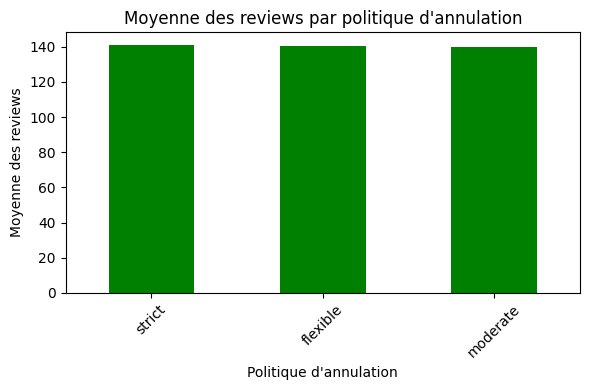

In [31]:
# Nettoyage
df['number of reviews'] = pd.to_numeric(df['number of reviews'], errors='coerce').fillna(0)

# Grouper par la politique d'annulation
cancellation_stats = df.groupby('cancellation_policy')['number of reviews'].mean().sort_values(ascending=False)

# Afficher les statistiques
print(cancellation_stats)

# Visualiser les résultats
plt.figure(figsize=(6, 4))
cancellation_stats.plot(kind='bar', color='green')
plt.title("Moyenne des reviews par politique d'annulation")
plt.ylabel("Moyenne des reviews")
plt.xlabel("Politique d'annulation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:

df['number of reviews'] = pd.to_numeric(df['number of reviews'], errors='coerce')
df['price'] = df['price'].replace('[\$, ]', '', regex=True).astype(float)

# Moyenne des reviews
mean_reviews = df['number of reviews'].mean()

# Groupes
low_reviews = df[df['number of reviews'] < 50]
medium_reviews = df[(df['number of reviews'] >= mean_reviews * 0.95) & 
                    (df['number of reviews'] <= mean_reviews * 1.05)]
high_reviews = df[df['number of reviews'] > 250]

# Fonction de résumé
def summarize_price(group, label):
    prices = group['price'].dropna()
    return {
        'label': label,
        'count': len(prices),
        'min_price': prices.min(),
        'mean_price': prices.mean(),
        'max_price': prices.max()
    }

# Résumés
summary_low = summarize_price(low_reviews, '📉 Peu populaires (<50 reviews)')
summary_med = summarize_price(medium_reviews, '📊 Moyenne popularité (±5% moyenne)')
summary_high = summarize_price(high_reviews, '📈 Très populaires (>250 reviews)')

# Afficher
for summary in [summary_low, summary_med, summary_high]:
    print(f"\n{summary['label']} ({summary['count']} logements):")
    print(f" - Prix minimum : ${summary['min_price']:.2f}")
    print(f" - Prix moyen   : ${summary['mean_price']:.2f}")
    print(f" - Prix maximum : ${summary['max_price']:.2f}")



📉 Peu populaires (<50 reviews) (39510 logements):
 - Prix minimum : $50.00
 - Prix moyen   : $626.66
 - Prix maximum : $1200.00

📊 Moyenne popularité (±5% moyenne) (1992 logements):
 - Prix minimum : $52.00
 - Prix moyen   : $636.49
 - Prix maximum : $1199.00

📈 Très populaires (>250 reviews) (27919 logements):
 - Prix minimum : $50.00
 - Prix moyen   : $625.38
 - Prix maximum : $1200.00


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Abdellatif\AppData\Local\Temp\ipykernel_19152\2694214937.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$, ]', '', regex=True).astype(float)
